## Importing Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import random
import seaborn as sns

## Defining parameters

In [2]:
# Define some initial params
# Dimensionality
Dn = 20

# Mutation probability
M = 0.1

# Population size
NP = 500

# No. of generations
G = 200

## Data Creation

In [3]:
r = np.random.random((Dn,))
def f(x):
    return ((x - r)**4).sum()

print r

[0.7015855  0.18442556 0.40836374 0.75924218 0.90704437 0.15043168
 0.31418993 0.81428942 0.51656334 0.36088124 0.98111698 0.60725929
 0.2795529  0.12128383 0.99948948 0.11199554 0.81169105 0.1343652
 0.75296467 0.44001095]


## Population Generation

In [4]:
# Generate population
pop = []

for ix in range(NP):
    # generate a random vector
    vec = np.random.uniform(-10, 10, (Dn,))
    
    # Add to population
    pop.append(vec)

print len(pop)

500


## Defining Functions for Mutation and Crossover

In [5]:
def crossover(parent_1, parent_2):
    child_1 = np.zeros(parent_1.shape)
    child_2 = np.zeros(parent_2.shape)
    
    dim = int(parent_1.shape[0] / 2.0)
    
    child_1[:dim] = parent_1[:dim]
    child_1[dim:] = parent_2[dim:]
    
    child_2[:dim] = parent_2[:dim]
    child_2[dim:] = parent_1[dim:]
    
    return child_1, child_2

def mutate(x):
    for ix in range(x.shape[0]):
        # Generate a random number for probability
        R = np.random.random()
        
        if R < M:
            # Mutate random index 
            x[ix] = np.random.uniform(-5, 5)
        else:
            pass
    return x

## Optimizing function using Genetic Algorithm

In [6]:
loss = []

# Main Genetic Algo loop
for gx in range(G):
    pop = sorted(pop, key=lambda z: f(z))
    print "Generation: {} | Best Value: {}".format(gx, f(pop[0]))
    loss.append(f(pop[0]))
    
    # create a temp population
    temp = []
    
    while not len(temp) == NP:
        # Select 2 parents from good section of population
        p1, p2 = random.sample(pop[:int(NP/2.0)], 2)
        
        # Apply crossover
        c1, c2 = crossover(p1, p2)
        
        # mutate
        c1 = mutate(c1)
        c2 = mutate(c2)
        
        temp.append(c1)
        temp.append(c2)
    
    # create a combined population
    comb = temp + pop
    
    # survival of the fittest
    pop = sorted(comb, key=lambda z: f(z))[:NP]

Generation: 0 | Best Value: 10714.3283514
Generation: 1 | Best Value: 5078.70311791
Generation: 2 | Best Value: 3935.4925409
Generation: 3 | Best Value: 1880.85251921
Generation: 4 | Best Value: 1738.75099869
Generation: 5 | Best Value: 1374.20494496
Generation: 6 | Best Value: 771.618352824
Generation: 7 | Best Value: 624.3521544
Generation: 8 | Best Value: 512.960388502
Generation: 9 | Best Value: 335.635941364
Generation: 10 | Best Value: 290.102895976
Generation: 11 | Best Value: 187.678531958
Generation: 12 | Best Value: 137.874647568
Generation: 13 | Best Value: 118.128712588
Generation: 14 | Best Value: 94.0763334473
Generation: 15 | Best Value: 66.7157442374
Generation: 16 | Best Value: 66.7157442374
Generation: 17 | Best Value: 18.0054728196
Generation: 18 | Best Value: 18.0054728196
Generation: 19 | Best Value: 18.0054728196
Generation: 20 | Best Value: 13.4869121669
Generation: 21 | Best Value: 9.98104127337
Generation: 22 | Best Value: 7.72296034818
Generation: 23 | Best Va

Generation: 186 | Best Value: 0.00825593835079
Generation: 187 | Best Value: 0.00825593835079
Generation: 188 | Best Value: 0.00825593835079
Generation: 189 | Best Value: 0.00682311460107
Generation: 190 | Best Value: 0.00682311460107
Generation: 191 | Best Value: 0.00682311460107
Generation: 192 | Best Value: 0.00663210232443
Generation: 193 | Best Value: 0.00663210232443
Generation: 194 | Best Value: 0.00663210232443
Generation: 195 | Best Value: 0.00663210232443
Generation: 196 | Best Value: 0.00663210232443
Generation: 197 | Best Value: 0.00640201084517
Generation: 198 | Best Value: 0.00568747271961
Generation: 199 | Best Value: 0.00568747271961


## Plotting Loss  

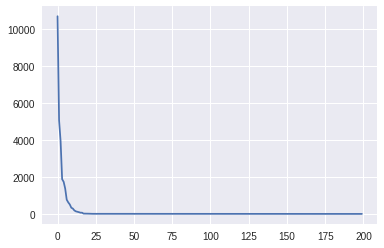

In [7]:
sns.plt.plot(loss)

In [8]:
print pop[0], r

[0.58471097 0.24907022 0.51459379 0.86143746 0.88548866 0.22772726
 0.11851245 0.9443935  0.56454865 0.23318256 1.07247373 0.61389853
 0.377345   0.27541819 0.82109745 0.26771548 0.75611745 0.17298758
 0.72452014 0.26933616] [0.7015855  0.18442556 0.40836374 0.75924218 0.90704437 0.15043168
 0.31418993 0.81428942 0.51656334 0.36088124 0.98111698 0.60725929
 0.2795529  0.12128383 0.99948948 0.11199554 0.81169105 0.1343652
 0.75296467 0.44001095]
